In [113]:
import tensorflow as tf
from collections import Counter
import h5py
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [108]:
print(x_train.shape)
print(len(x_train))
print(Counter(y_train))
print(y_train.shape)

(60000, 28, 28)
60000
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
(60000,)


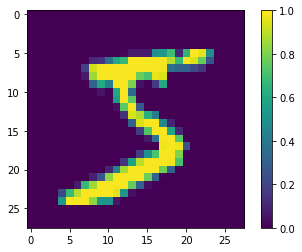

In [115]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.4865 - accuracy: 0.8560
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1520 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.1122 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.0891 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 2s 997us/step - loss: 0.0743 - accuracy: 0.9771
313/313 - 0s - loss: 0.0776 - accuracy: 0.9773


[0.07759497314691544, 0.9772999882698059]

In [97]:
def load_dataset():
    #train_dataset = h5py.File('/home/yee/GraduationDesign/MakeSampleSet/Train_Set_cat.h5', "r")
    train_dataset = h5py.File('/home/yee/Practive/DL_HomeWork/course1_week2/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    #test_dataset = h5py.File('/home/yee/GraduationDesign/MakeSampleSet/Test_Set_cat.h5', "r")
    test_dataset = h5py.File('/home/yee/Practive/DL_HomeWork/course1_week2/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    # classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [98]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

In [116]:
#train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
#test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
#print(train_set_x_orig)
train_x = train_set_x_orig / 255.0
train_y = train_set_y
test_x = test_set_x_orig / 255.0
test_y = test_set_y

In [117]:
print(train_x.shape)
print(test_y.shape)
print(test_y[0].shape)

(209, 64, 64, 3)
(1, 50)
(50,)


In [118]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_50 (Dense)             (None, 20)                245780    
_________________________________________________________________
dropout_33 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 7)                 147       
_________________________________________________________________
dropout_34 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 40        
_________________________________________________________________
dropout_35 (Dropout)         (None, 5)               

In [120]:
model.fit(train_x, train_y[0], epochs=5)
model.evaluate(test_x, test_y[0], verbose=2)

Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: 0.7645 - accuracy: 0.6323
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 0.8163 - accuracy: 0.5897
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6031
Epoch 4/5
7/7 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.6320
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.6259
2/2 - 0s - loss: 0.7363 - accuracy: 0.3400


[0.7362824082374573, 0.3400000035762787]